<h1>Question 8</h1>

In [2]:
%run Common.ipynb

import os.path
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, NMF

%matplotlib inline

In [3]:
class1 = ['comp.sys.ibm.pc.hardware', 'comp.graphics', 'comp.sys.mac.hardware', 'comp.os.ms-windows.misc']
class2 = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

categories = class1 + class2

dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

vectorizer = TfidfVectorizer(min_df=3, stop_words = 'english')

data_tfidf = vectorizer.fit_transform(dataset.data)

In [4]:
svd = TruncatedSVD(n_components=2)
data_tfidf_svd = svd.fit_transform(data_tfidf)

nmf = NMF(n_components=2)
data_tfidf_nmf = nmf.fit_transform(data_tfidf)

In [5]:
targets = [dataset.target_names[i] for i in dataset.target]
# assign classes to train documents
for i, target in enumerate(targets):
    if target in class1:
        dataset.target[i] = 1
    else:
        dataset.target[i] = 0
        
dataset.target_names = ["Class 1", "Class 2"]

In [6]:
from collections import Counter
cat_count = Counter(dataset.target)
cat_count

Counter({0: 3979, 1: 3903})

In [7]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
    
def kmean_and_visualize(title, X):
    km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=100, n_jobs=8)
    km.fit(X)

    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.scatter(x=X[:,0], y=X[:,1], c=km.labels_, 
                edgecolors='k', linewidth=0.25, s=30, cmap=plt.get_cmap('cool'),vmin=0.3, vmax=0.7, alpha=0.3)
    ax1.set_title(title)

    ax2.scatter(x=X[:,0], y=X[:,1], c=dataset.target,
                edgecolors='k', linewidth=0.25, s=30, cmap=plt.get_cmap('cool'),vmin=0.3, vmax=0.7, alpha=0.3)
    ax2.set_title('Ground Truth')
    #_ = fig.suptitle('SVD Visualization')
    report_scores(km.labels_)

def report_scores(preds):
    print("Homogeneity Score: %f" %homogeneity_score(dataset.target, preds))
    print("Completeness Score: %f" %completeness_score(dataset.target, preds))
    print("V-Measure Score: %f" %v_measure_score(dataset.target, preds))
    print("Adjusted Rand Score: %f" %adjusted_rand_score(dataset.target, preds))
    print("Adjusted Mutual Info Score: %f" %adjusted_mutual_info_score(dataset.target, preds))

<h3>SVD, Scaled</h3>

In [8]:
# Before scaling
data_tfidf_svd.std(axis=0)

array([0.03435595, 0.07132312])

In [10]:
from sklearn.preprocessing import scale

# scale to unit variance
data_tfidf_svd_scaled = scale(data_tfidf_svd, axis=0, with_mean=False, with_std=True)

In [11]:
# After scaling
data_tfidf_svd_scaled.std(axis=0) # verifying

array([1., 1.])

Homogeneity Score: 0.231201
Completeness Score: 0.258432
V-Measure Score: 0.244059
Adjusted Rand Score: 0.252070
Adjusted Mutual Info Score: 0.231131


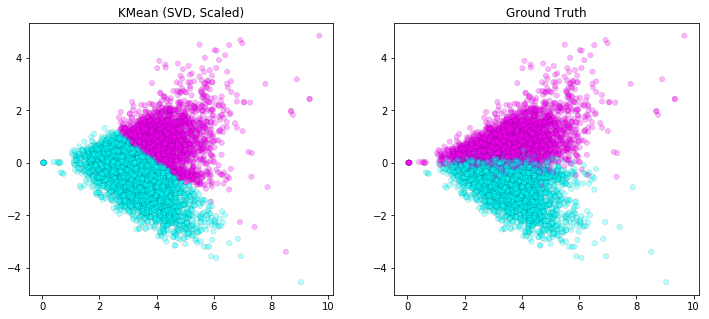

In [8]:
kmean_and_visualize('KMean (SVD, Scaled)', data_tfidf_svd_scaled)

<h3>SVD, Log-Transformed</h3>

In [23]:
c_reg = 0.01 # regularizer value for log transformation

In [34]:
sign_mat = np.sign(data_tfidf_svd) # sign(x)

In [38]:
from numpy.linalg import norm
# log(|x| + c) - log(c)
log_vec = np.log( np.abs(data_tfidf_svd) + c_reg ) - np.log(c_reg)

In [39]:
data_tfidf_svd_log = (sign_mat * log_vec)

In [40]:
sign_mat

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       ...,
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1., -1.]])

In [41]:
log_vec

array([[2.60206012, 1.03147799],
       [2.5247276 , 1.85257821],
       [2.77084266, 2.68764773],
       ...,
       [2.35116066, 0.95963194],
       [2.76441724, 0.70169706],
       [2.31102634, 0.02755605]])

In [42]:
data_tfidf_svd_log

array([[ 2.60206012,  1.03147799],
       [ 2.5247276 ,  1.85257821],
       [ 2.77084266,  2.68764773],
       ...,
       [ 2.35116066,  0.95963194],
       [ 2.76441724,  0.70169706],
       [ 2.31102634, -0.02755605]])

Homogeneity Score: 0.603575
Completeness Score: 0.603537
V-Measure Score: 0.603556
Adjusted Rand Score: 0.710928
Adjusted Mutual Info Score: 0.603501


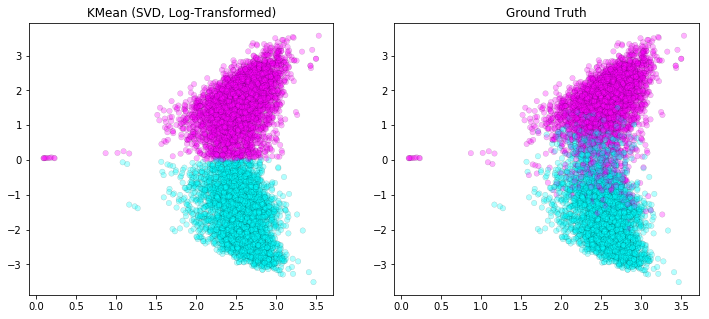

In [43]:
kmean_and_visualize('KMean (SVD, Log-Transformed)', data_tfidf_svd_log)

<h3>SVD, Scaled, Log-Transformed</h3>

In [44]:
# scale to unit variance
data_tfidf_svd_scaled = scale(data_tfidf_svd, axis=0, with_mean=False, with_std=True)

# then log-transform
sign_mat = np.sign(data_tfidf_svd_scaled) # sign(x)
log_vec = np.log( np.abs(data_tfidf_svd_scaled) + c_reg ) - np.log(c_reg)
data_tfidf_svd_scaled_log = (sign_mat * log_vec)

Homogeneity Score: 0.602265
Completeness Score: 0.602225
V-Measure Score: 0.602245
Adjusted Rand Score: 0.709644
Adjusted Mutual Info Score: 0.602189


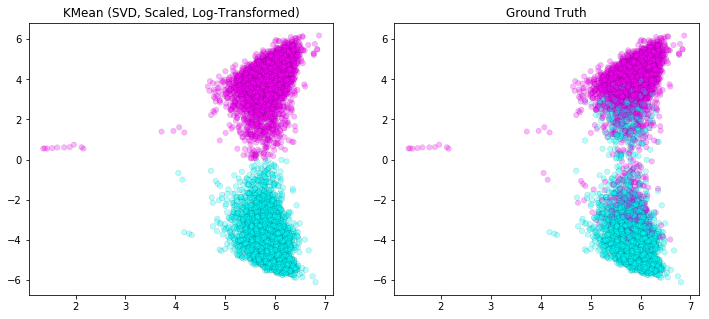

In [45]:
kmean_and_visualize('KMean (SVD, Scaled, Log-Transformed)', data_tfidf_svd_scaled_log)

<h3>SVD, Log-Transformed, Scaled</h3>

In [50]:
# log-transform
sign_mat = np.sign(data_tfidf_svd) # sign(x)
log_vec = np.log( np.abs(data_tfidf_svd) + c_reg ) - np.log(c_reg)
data_tfidf_svd_log = (sign_mat * log_vec)

# then scale to unit variance
data_tfidf_svd_log_scaled = scale(data_tfidf_svd_log, axis=0, with_mean=False, with_std=True)

Homogeneity Score: 0.601952
Completeness Score: 0.601914
V-Measure Score: 0.601933
Adjusted Rand Score: 0.709217
Adjusted Mutual Info Score: 0.601877


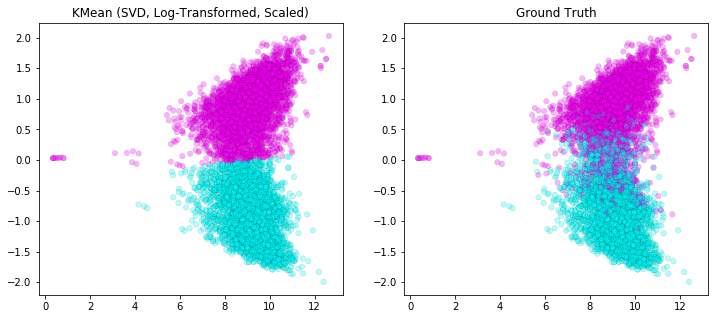

In [51]:
kmean_and_visualize('KMean (SVD, Log-Transformed, Scaled)', data_tfidf_svd_log_scaled)

<h3>NMF, Scaled</h3>

In [19]:
# scale to unit variance
data_tfidf_nmf_scaled = scale(data_tfidf_nmf, axis=0, with_mean=False, with_std=True)
data_tfidf_nmf_scaled.std(axis=0) # verifying

array([1., 1.])

Homogeneity Score: 0.682804
Completeness Score: 0.685646
V-Measure Score: 0.684222
Adjusted Rand Score: 0.773443
Adjusted Mutual Info Score: 0.682775


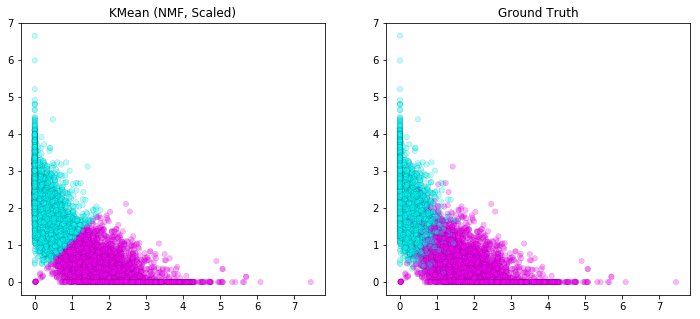

In [20]:
kmean_and_visualize('KMean (NMF, Scaled)', data_tfidf_nmf_scaled)

<h3>NMF, Log-Transformed</h3>

In [52]:
sign_mat = np.sign(data_tfidf_nmf) # sign(x)
log_vec = np.log( np.abs(data_tfidf_nmf) + c_reg ) - np.log(c_reg) # log(|x| + c) - log(c)
data_tfidf_nmf_log = (sign_mat * log_vec)

In [53]:
data_tfidf_nmf_log

array([[1.36133672, 1.24808576],
       [1.65031981, 0.45234222],
       [2.07267708, 0.        ],
       ...,
       [1.19896963, 0.99660456],
       [1.36622121, 1.5122319 ],
       [0.8024985 , 1.33384856]])

Homogeneity Score: 0.676623
Completeness Score: 0.679814
V-Measure Score: 0.678215
Adjusted Rand Score: 0.766762
Adjusted Mutual Info Score: 0.676593


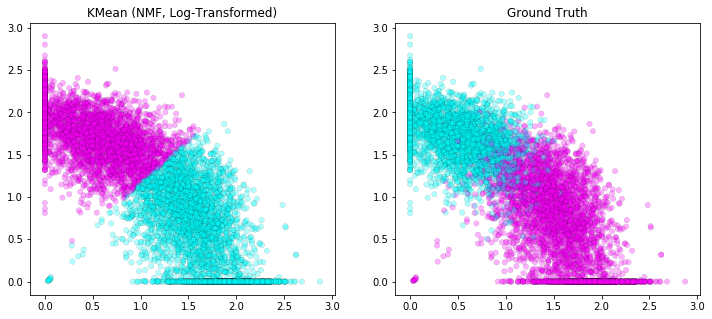

In [54]:
kmean_and_visualize('KMean (NMF, Log-Transformed)', data_tfidf_nmf_log)

<h3>NMF, Scaled, Log-Transformed</h3>

In [55]:
# scale to unit variance
data_tfidf_nmf_scaled = scale(data_tfidf_nmf, axis=0, with_mean=False, with_std=True)

# then log-transform
sign_mat = np.sign(data_tfidf_nmf_scaled) # sign(x)
log_vec = np.log( np.abs(data_tfidf_nmf_scaled) + c_reg ) - np.log(c_reg) # log(|x| + c) - log(c)
data_tfidf_nmf_scaled_log = (sign_mat * log_vec)

Homogeneity Score: 0.313165
Completeness Score: 0.382842
V-Measure Score: 0.344515
Adjusted Rand Score: 0.248770
Adjusted Mutual Info Score: 0.313102


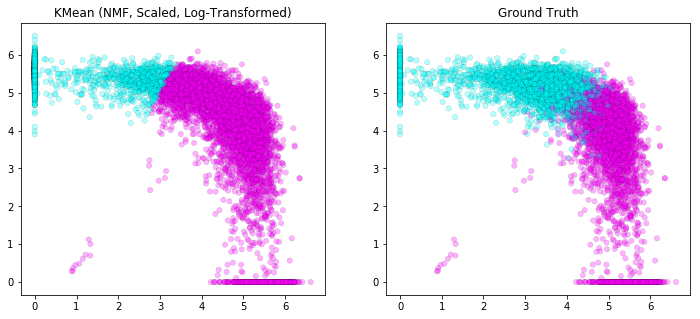

In [56]:
kmean_and_visualize('KMean (NMF, Scaled, Log-Transformed)', data_tfidf_nmf_scaled_log)

<h3>NMF, Log-Transformed, Scaled</h3>

In [57]:
# log-transform
sign_mat = np.sign(data_tfidf_nmf) # sign(x)
log_vec = np.log( np.abs(data_tfidf_nmf) + c_reg ) - np.log(c_reg) # log(|x| + c) - log(c)
data_tfidf_nmf_log = (sign_mat * log_vec)

# then scale to unit variance
data_tfidf_nmf_log_scaled = scale(data_tfidf_nmf_log, axis=0, with_mean=False, with_std=True)

Homogeneity Score: 0.686351
Completeness Score: 0.689055
V-Measure Score: 0.687701
Adjusted Rand Score: 0.777018
Adjusted Mutual Info Score: 0.686323


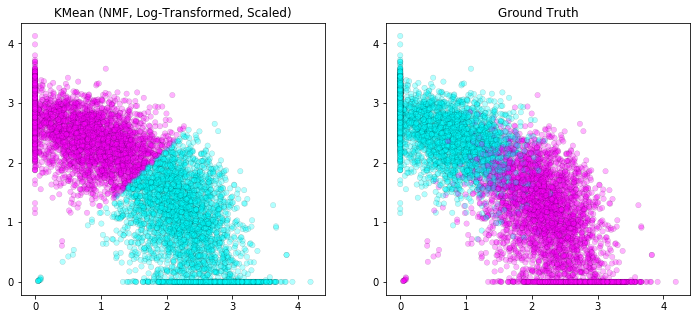

In [58]:
kmean_and_visualize('KMean (NMF, Log-Transformed, Scaled)', data_tfidf_nmf_log_scaled)

<h2>Conclusion</h2>
<p>SVD works best with just log-transformation without scaling.</p>
<p>NMF works best with log-transformation then scaling.</p>